In [1]:
!pip install matplotlib #to install matplotlib
!pip install mpl_toolkits #to install mpl_toolkits
!pip install psutil #to install psutil
!pip install scikit-learn #to install scikit-learn

ERROR: Could not find a version that satisfies the requirement mpl_toolkits (from versions: none)
ERROR: No matching distribution found for mpl_toolkits


In [2]:
!pip install --pre pycaret # to install pycaret

In [3]:
#to import all Pycaret regression functions
from pycaret.regression import *

In [4]:
import pandas as pd    #to import pandas as pd
import numpy as np    #to import numpy as np
import random
from google.colab import files
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.model_selection import train_test_split
from sklearn.model_selection import ParameterGrid
from sklearn.metrics import mean_squared_error  #to import MSE
from sklearn.metrics import mean_absolute_error #to import MAE
from sklearn.metrics import mean_absolute_percentage_error #to import MAPE
from sklearn.metrics import r2_score #to import coefficient of determination
import matplotlib.pyplot as plt  #to import matplotlib as plt
import seaborn as sns #to import seaborn as sns
import math #to import math

In [5]:
#to access the data file from google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
#to open the data file from google drive
df_imputer = pd.read_excel(r'/content/drive/My Drive/Colab Notebooks/ML Conference/Data for Imputation.xlsx')
df = pd.read_excel(r'/content/drive/My Drive/Colab Notebooks/ML Conference/CNC reinforced PVA composites.xlsx') #to save the data file as df
df_imputer.head() #returns the first 5 rows of the data
df.head() #returns the first 5 rows of the data

,Hydrolysis degree (%),Molecular weight (Da),PVA percentage in water (%),PVA Temperature (°C),PVA time (min),Mix Temperature (°C),Mix time (min),Sonication time (min),Diameter/Width (nm),CNC (%),Tensile strength (MPa)
0,98.5,72000,5,90,60,0.0,0,30,0,0.0,18.137
1,98.5,72000,5,90,60,0.0,0,30,NAN,5.0,23.627
2,98.5,72000,5,90,60,0.0,0,30,NAN,10.0,28.627
3,98.5,72000,5,90,60,0.0,0,30,NAN,15.0,33.921
4,98.5,72000,5,90,60,0.0,0,30,NAN,20.0,38.921


In [9]:
df_missingvalues = df_imputer.copy() #to copy the data file as df_missingvalues
ds_hd = df_missingvalues['Hydrolysis degree (%)'].shape #returns the shape of the data

missing_mask_hd = random.sample(range(0, ds_hd[0]), 10)
df_valueshd_real = df_imputer['Hydrolysis degree (%)'][missing_mask_hd].tolist()
df_missingvalues['Hydrolysis degree (%)'][missing_mask_hd] = np.nan
missing_mask_mw = random.sample(range(0, ds_hd[0]), 10)
df_valuesmw_real = df_imputer['Molecular weight (Da)'][missing_mask_mw].tolist()
df_missingvalues['Molecular weight (Da)'][missing_mask_mw] = np.nan
missing_mask_pvaper = random.sample(range(0, ds_hd[0]), 10)
df_valuespvaper_real = df_imputer['PVA percentage in water (%)'][missing_mask_pvaper].tolist()
df_missingvalues['PVA percentage in water (%)'][missing_mask_pvaper] = np.nan
missing_mask_pvaTemp = random.sample(range(0, ds_hd[0]), 10)
df_valuespvaTemp_real = df_imputer['PVA Temperature (°C)'][missing_mask_pvaTemp].tolist()
df_missingvalues['PVA Temperature (°C)'][missing_mask_pvaTemp] = np.nan
missing_mask_pvatime = random.sample(range(0, ds_hd[0]), 10)
df_valuespvatime_real = df_imputer['PVA time (min)'][missing_mask_pvatime].tolist()
df_missingvalues['PVA time (min)'][missing_mask_pvatime] = np.nan
missing_mask_diameter = random.sample(range(0, ds_hd[0]), 10)
df_valuesdiameter_real = df_imputer['Diameter/Width (nm)'][missing_mask_diameter].tolist()
df_missingvalues['Diameter/Width (nm)'][missing_mask_diameter] = np.nan

df_valueshd_imputed = []
df_valuesmw_imputed = []
df_valuespvaper_imputed = []
df_valuespvaTemp_imputed = []
df_valuespvatime_imputed = []
df_valuesdiameter_imputed = []


max_depth = list(range(6, 27)) + [None]
param_grid = ParameterGrid({"n_estimators": list(range(20, 117)),
     "max_depth": max_depth})

results = []
best_score = 0
original_score = 0
z=0
for param in param_grid:
  z=z+1
  print(f"Iteration {z}")
  imputer = IterativeImputer(estimator=ExtraTreesRegressor(**param, random_state=42), random_state=42)
  fit = imputer.fit(df_missingvalues)
  df_hd_imputed = fit.transform(df_missingvalues)
  for i in missing_mask_hd:
    df_valueshd_imputed.append(df_hd_imputed[i][0])
  for j in missing_mask_mw:
    df_valuesmw_imputed.append(df_hd_imputed[j][1])
  for k in missing_mask_pvaper:
    df_valuespvaper_imputed.append(df_hd_imputed[k][2])
  for l in missing_mask_pvaTemp:
    df_valuespvaTemp_imputed.append(df_hd_imputed[l][3])
  for m in missing_mask_pvatime:
    df_valuespvatime_imputed.append(df_hd_imputed[m][4])
  for n in missing_mask_diameter:
    df_valuesdiameter_imputed.append(df_hd_imputed[n][8])
  errorhd = r2_score(df_valueshd_real, df_valueshd_imputed)
  errormw = r2_score(df_valuesmw_real, df_valuesmw_imputed)
  errorpvaper = r2_score(df_valuespvaper_real, df_valuespvaper_imputed)
  errorpvaTemp = r2_score(df_valuespvaTemp_real, df_valuespvaTemp_imputed)
  errorpvatime = r2_score(df_valuespvatime_real, df_valuespvatime_imputed)
  errordiameter = r2_score(df_valuesdiameter_real, df_valuesdiameter_imputed)
  score = (errorhd + errormw + errorpvaper + errorpvaTemp + errorpvatime + errordiameter)/6
  param["score"]= score
  results.append(param)
  df_valueshd_imputed.clear()
  df_valuesmw_imputed.clear()
  df_valuespvaper_imputed.clear()
  df_valuespvaTemp_imputed.clear()
  df_valuespvatime_imputed.clear()
  df_valuesdiameter_imputed.clear()
  if param['max_depth'] == None and param['n_estimators']==100:
    original_score = score
  if score > best_score:
    best_score = score
    best_param = param


print(f"  Original values for hyperparameters:")
print(f"  max_depth: None")
print(f"  n_estimators: 100")
print(f"  Original score: {original_score}")
print("-" * 50)
print(f"  Optimal values for hyperparameters:")
print(f"  max_depth: {best_param['max_depth']}")
print(f"  n_estimators: {best_param['n_estimators']}")
print(f"  Optimal score: {best_score}")

Iteration 1
Iteration 2
Iteration 3
Iteration 4
Iteration 5
Iteration 6
Iteration 7
Iteration 8
Iteration 9
Iteration 10
Iteration 11
Iteration 12
Iteration 13
Iteration 14
Iteration 15
Iteration 16
Iteration 17
Iteration 18
Iteration 19
Iteration 20
Iteration 21
Iteration 22
Iteration 23
Iteration 24
Iteration 25
Iteration 26
Iteration 27
Iteration 28
Iteration 29
Iteration 30
Iteration 31
Iteration 32
Iteration 33
Iteration 34
Iteration 35
Iteration 36
Iteration 37
Iteration 38
Iteration 39
Iteration 40
Iteration 41
Iteration 42
Iteration 43
Iteration 44
Iteration 45
Iteration 46
Iteration 47
Iteration 48
Iteration 49
Iteration 50
Iteration 51
Iteration 52
Iteration 53
Iteration 54
Iteration 55
Iteration 56
Iteration 57
Iteration 58
Iteration 59
Iteration 60
Iteration 61
Iteration 62
Iteration 63
Iteration 64
Iteration 65
Iteration 66
Iteration 67
Iteration 68
Iteration 69
Iteration 70
Iteration 71
Iteration 72
Iteration 73
Iteration 74
Iteration 75
Iteration 76
Iteration 77
Iteratio

In [10]:
md = best_param['max_depth']
ne = best_param['n_estimators']
optimized_imputer = IterativeImputer(estimator=ExtraTreesRegressor(n_estimators = ne, max_depth = md ,random_state=42), random_state = 42)
op_fit = optimized_imputer.fit(df)
opimputed_df = pd.DataFrame(op_fit.transform(df), columns=df.columns)
pd.options.display.max_rows = None  # To show all rows
pd.options.display.max_columns = None # To show all columns
print(opimputed_df)
opimputed_df.to_excel("dataframe_imputed.xlsx", index=False)
files.download("dataframe_imputed.xlsx")

     Hydrolysis degree (%)  Molecular weight (Da)  \
0                98.500000           72000.000000   
1                98.500000           72000.000000   
2                98.500000           72000.000000   
3                98.500000           72000.000000   
4                98.500000           72000.000000   
5                98.000000          145000.000000   
6                98.000000          145000.000000   
7                98.000000          145000.000000   
8                98.000000          145000.000000   
9                98.000000          145000.000000   
10               98.000000          145000.000000   
11               98.000000          145000.000000   
12               98.000000          145000.000000   
13               89.000000          155000.000000   
14               89.000000          155000.000000   
15               89.000000          155000.000000   
16               89.000000          155000.000000   
17               89.000000          155000.000

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [11]:
round(opimputed_df.describe(),2) # describe() returns the description of the data in the DataFrame (mean, standard deviation, and percentiles)
# A data frame is a data structure that organizes data into a 2-dimensional table of rows and columns
#round(): returns a value with a specific number of decimals

,Hydrolysis degree (%),Molecular weight (Da),PVA percentage in water (%),PVA Temperature (°C),PVA time (min),Mix Temperature (°C),Mix time (min),Sonication time (min),Diameter/Width (nm),CNC (%),Tensile strength (MPa)
count,107.00,107.00,107.00,107.00,107.00,107.00,107.00,107.00,107.00,107.00,107.00
mean,96.58,97073.49,6.79,58.41,74.76,50.35,97.20,22.93,93.09,3.79,58.49
std,3.56,41025.35,3.35,39.54,83.30,37.70,116.98,46.90,373.26,4.20,31.15
min,88.00,30000.00,2.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,7.95
25%,96.69,60000.00,3.00,0.00,0.00,0.00,0.00,0.00,5.90,1.00,33.83
50%,98.00,105118.18,7.94,80.00,60.00,77.50,60.00,10.00,7.97,3.00,54.20
75%,98.75,136000.00,10.00,90.00,110.73,80.00,180.00,10.00,30.00,5.00,75.99
max,100.00,155000.00,10.00,95.00,360.00,95.00,480.00,180.00,1975.00,20.00,143.57


In [12]:
round(opimputed_df.corr( ),2)  #to calculate the correlation coefficient of the variables and round the values to two decimal places

,Hydrolysis degree (%),Molecular weight (Da),PVA percentage in water (%),PVA Temperature (°C),PVA time (min),Mix Temperature (°C),Mix time (min),Sonication time (min),Diameter/Width (nm),CNC (%),Tensile strength (MPa)
Hydrolysis degree (%),1.00,-0.29,0.27,0.09,-0.05,-0.16,-0.61,-0.24,0.20,0.05,-0.65
Molecular weight (Da),-0.29,1.00,-0.40,-0.17,-0.15,0.04,0.22,-0.04,0.23,0.06,0.39
PVA percentage in water (%),0.27,-0.40,1.00,-0.25,-0.02,0.39,-0.13,-0.30,-0.21,0.12,-0.25
PVA Temperature (°C),0.09,-0.17,-0.25,1.00,0.56,-0.64,-0.28,-0.30,0.11,-0.04,-0.03
PVA time (min),-0.05,-0.15,-0.02,0.56,1.00,-0.22,0.12,-0.22,0.10,-0.10,0.04
Mix Temperature (°C),-0.16,0.04,0.39,-0.64,-0.22,1.00,0.29,0.28,0.02,0.10,0.07
Mix time (min),-0.61,0.22,-0.13,-0.28,0.12,0.29,1.00,0.17,-0.11,-0.06,0.29
Sonication time (min),-0.24,-0.04,-0.30,-0.30,-0.22,0.28,0.17,1.00,-0.08,-0.23,0.04
Diameter/Width (nm),0.20,0.23,-0.21,0.11,0.10,0.02,-0.11,-0.08,1.00,0.13,-0.13
CNC (%),0.05,0.06,0.12,-0.04,-0.10,0.10,-0.06,-0.23,0.13,1.00,0.17


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

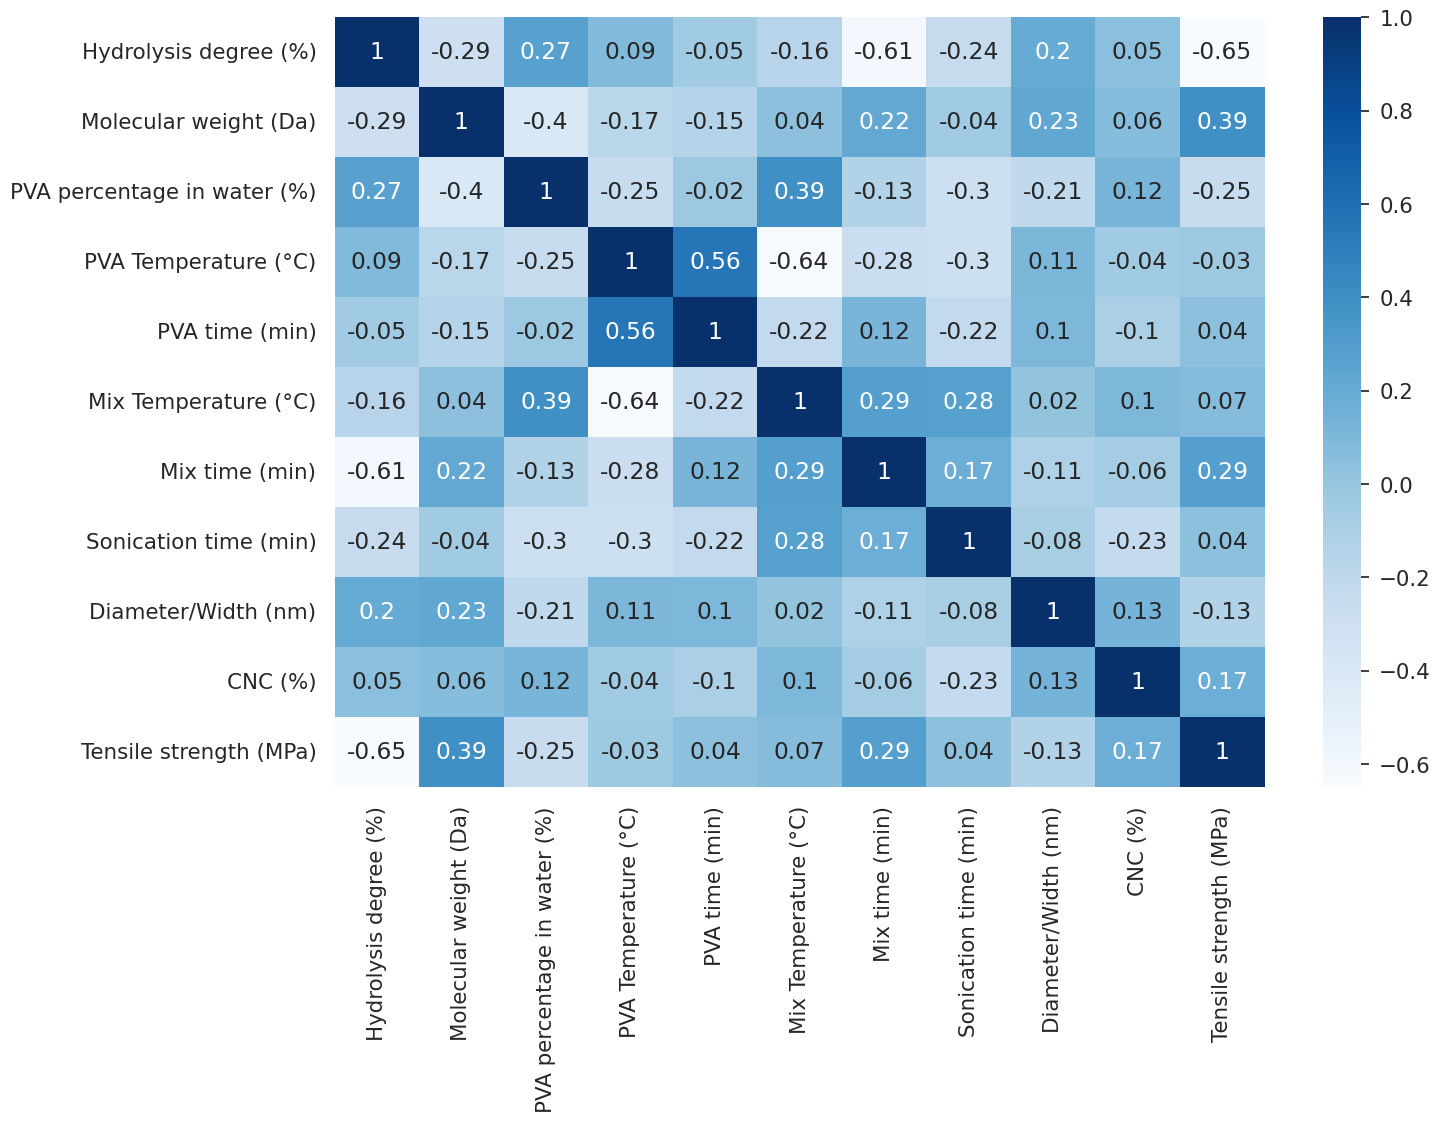

In [13]:
df_corr =  round(opimputed_df.corr( ),2) #to save the correlation coefficients as df_corr
plt.figure(figsize=(15,10)) #plt.figure() to graph the table
#figsize: width, height in inches of the figure
sns.set(font_scale=1.4) #font size
heat_map = sns.heatmap(df_corr,annot=True,cmap=plt.cm.Blues) #to create the heatmap
#annot=True: to write the data value in each cell'
#cmap=plt.cm.Blues: the color of the heatmap
#to save the image
plt.savefig("heat_map.png", dpi=1200, format='png', bbox_inches='tight')
files.download("heat_map.png")

In [14]:
#setup(): to initialize the environment
#opimputed_df is the dataset
#target is the tensile strength
#normalize = True: to normalize the data
#normalize_method = 'zscore': the method to normalize the data
#numeric_features: the input variables
#fold=3: for k-fold cross validation
reg = setup(opimputed_df, target = 'Tensile strength (MPa)',
            session_id = 42,
             fold=3,
            train_size=0.9,
            numeric_features = ['Hydrolysis degree (%)', 'Molecular weight (Da)',
                                'PVA percentage in water (%)', 'PVA Temperature (°C)',
                                'PVA time (min)', 'Mix Temperature (°C)',
                                'Mix time (min)', 'Sonication time (min)',
                                'Diameter/Width (nm)', 'CNC (%)'],
            use_gpu = False)

,Description,Value
0,Session id,42
1,Target,Tensile strength (MPa)
2,Target type,Regression
3,Original data shape,"(107, 11)"
4,Transformed data shape,"(107, 11)"
5,Transformed train set shape,"(96, 11)"
6,Transformed test set shape,"(11, 11)"
7,Numeric features,10
8,Preprocess,True
9,Imputation type,simple


In [15]:
best_model = compare_models() #to compare all regression models

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
et,Extra Trees Regressor,10.3762,240.2254,15.2663,0.7457,0.2738,0.2365,0.1500
xgboost,Extreme Gradient Boosting,12.3653,299.6475,17.0083,0.6858,0.3250,0.2763,0.1067
gbr,Gradient Boosting Regressor,12.2660,322.9912,17.5476,0.6678,0.3216,0.2701,0.0967
rf,Random Forest Regressor,12.6426,329.7217,17.7967,0.6511,0.3226,0.2894,0.1967
ada,AdaBoost Regressor,14.2414,448.9303,20.6985,0.5396,0.3631,0.3283,0.1033
dt,Decision Tree Regressor,14.5124,444.9156,20.7400,0.4789,0.3833,0.3413,0.0267
lightgbm,Light Gradient Boosting Machine,17.2864,572.4547,23.5622,0.3640,0.4212,0.4488,0.0767
en,Elastic Net,19.8625,682.4621,25.8903,0.2501,0.4885,0.4789,0.0500
llar,Lasso Least Angle Regression,19.8422,687.8434,25.9716,0.2430,0.4895,0.4769,0.0533
lasso,Lasso Regression,19.8423,687.8433,25.9716,0.2430,0.4895,0.4769,0.0433


Processing:   0%|          | 0/81 [00:00<?, ?it/s]

In [16]:
et_train = create_model('et') #to create a extra trees regression model

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,8.8454,151.0485,12.2902,0.7652,0.3715,0.3500
1,11.2795,352.7063,18.7805,0.7550,0.2033,0.1383
2,11.0036,216.9213,14.7282,0.7168,0.2467,0.2210
Mean,10.3762,240.2254,15.2663,0.7457,0.2738,0.2365
Std,1.0882,83.9594,2.6768,0.0208,0.0713,0.0871


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [17]:
et_test = predict_model(et_train) #to tune the extra trees regression model

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Extra Trees Regressor,4.1782,23.2821,4.8252,0.9530,0.1121,0.0927


In [18]:
xgboost_train = create_model('xgboost') #to create a XGBoost regression model

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,9.7448,181.9804,13.4900,0.7171,0.3939,0.3734
1,14.7335,452.4197,21.2702,0.6857,0.2893,0.2170
2,12.6177,264.5424,16.2648,0.6547,0.2918,0.2386
Mean,12.3653,299.6475,17.0083,0.6858,0.3250,0.2763
Std,2.0444,113.1625,3.2195,0.0255,0.0487,0.0692


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [19]:
xgboost_predict = predict_model(xgboost_train) #to predict the model

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Extreme Gradient Boosting,7.0021,111.0309,10.5371,0.7759,0.1280,0.1223


In [21]:
gbr_train = create_model('gbr') #to create a decision tree regression model

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,9.4489,171.8878,13.1106,0.7328,0.3972,0.3762
1,14.7088,509.2490,22.5665,0.6462,0.2810,0.1932
2,12.6401,287.8368,16.9658,0.6243,0.2865,0.2408
Mean,12.2660,322.9912,17.5476,0.6678,0.3216,0.2701
Std,2.1636,139.9524,3.8822,0.0469,0.0535,0.0775


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [22]:
gbr_test = predict_model(gbr_train) #to tune the decision tree regression model

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Gradient Boosting Regressor,5.9146,54.3499,7.3722,0.8903,0.1352,0.1200


In [23]:
rf_train = create_model('rf') #to create a random forest regression model

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,9.5716,168.5856,12.9841,0.7379,0.4123,0.4111
1,13.6152,469.2522,21.6622,0.6740,0.2368,0.1614
2,14.7411,351.3272,18.7437,0.5414,0.3188,0.2956
Mean,12.6426,329.7217,17.7967,0.6511,0.3226,0.2894
Std,2.2197,123.6937,3.6056,0.0818,0.0717,0.1020


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [24]:
rf_test = predict_model(rf_train) #to tune the random forest regression model

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Random Forest Regressor,5.7807,85.5584,9.2498,0.8273,0.1253,0.0996


In [25]:
ada_train = create_model('ada') #to create an AdaBoost regression model

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,12.1727,268.2853,16.3794,0.5829,0.4815,0.5353
1,15.5001,726.4151,26.9521,0.4953,0.2969,0.1697
2,15.0515,352.0906,18.7641,0.5404,0.3110,0.2798
Mean,14.2414,448.9303,20.6985,0.5396,0.3631,0.3283
Std,1.4742,199.1719,4.5278,0.0358,0.0839,0.1531


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [26]:
ada_test = predict_model(ada_train) #to tune the AdaBoost regression model

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,AdaBoost Regressor,8.5933,184.7728,13.5931,0.6270,0.2111,0.1574


In [27]:
X = opimputed_df.drop('Tensile strength (MPa)', axis=1)
y = opimputed_df['Tensile strength (MPa)']  #Target

In [28]:
#Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.9, random_state=42)
#Implement the ExtraTreesRegressor model
model_et = ExtraTreesRegressor( random_state=42)
# Train the ExtraTreesRegressor model
model_et.fit(X_train, y_train)
# Test the ExtraTreesRegressor model
y_train_pred_et = model_et.predict(X_train)
y_test_pred_et = model_et.predict(X_test)
# Evaluate the train model
mse_train_et = mean_squared_error(y_train, y_train_pred_et)
rmse_train_et = np.sqrt(mse_train_et)
mae_train_et = mean_absolute_error(y_train, y_train_pred_et)
mape_train_et = mean_absolute_percentage_error(y_train, y_train_pred_et)
r2_train_et = r2_score(y_train, y_train_pred_et)
# Evaluate the test model
mse_test_et = mean_squared_error(y_test, y_test_pred_et)
rmse_test_et = np.sqrt(mse_test_et)
mae_test_et = mean_absolute_error(y_test, y_test_pred_et)
mape_test_et = mean_absolute_percentage_error(y_test, y_test_pred_et)
r2_test_et = r2_score(y_test, y_test_pred_et)
# Statistical metrics for train dataset
print("Train Metrics:")
print(f'MSE: {mse_train_et}')
print(f'RMSE: {rmse_train_et}')
print(f'MAE: {mae_train_et}')
print(f'MAPE: {mape_train_et}')
print(f'R2: {r2_train_et}')
# Statistical metrics for test dataset
print("\nTest Metrics:")
print(f'MSE: {mse_test_et}')
print(f'RMSE: {rmse_test_et}')
print(f'MAE: {mae_test_et}')
print(f'MAPE: {mape_test_et}')
print(f'R2: {r2_test_et}')

Train Metrics:
MSE: 8.828052000016286e-27
RMSE: 9.395771389309282e-14
MAE: 7.456072796211781e-14
MAPE: 1.267113543548527e-15
R2: 1.0

Test Metrics:
MSE: 24.575085793720813
RMSE: 4.957326476410527
MAE: 4.280229954090904
MAPE: 0.09639092001057242
R2: 0.9503967970334873


In [42]:
# Search space
model = ExtraTreesRegressor(random_state=42)

param_distributions = {
    "n_estimators": list(range(10, 101)),
    "max_depth": list(range(5, 51)),
    "min_samples_split": list(range(2, 12)),
    "min_samples_leaf": list(range(1, 12)),
    "criterion": ["squared_error", "absolute_error", "poisson"],
    "max_features": list(range(1, 14))
}


random_search_et = RandomizedSearchCV(
    estimator=model,
    param_distributions=param_distributions,
    n_iter=2000,
    scoring='r2',
    cv=3,
    random_state=42,
    verbose=1,
    n_jobs=-1
)


random_search_et.fit(X_train, y_train)


best_pipeline_et = random_search_et.best_estimator_
print(best_pipeline_et)

# Test the ExtraTreesRegressor model
y_train_pred_et_tune = best_pipeline_et.predict(X_train)
y_test_pred_et_tune = best_pipeline_et.predict(X_test)
# Evaluate the train model
mse_train_et_tune = mean_squared_error(y_train, y_train_pred_et_tune)
rmse_train_et_tune = np.sqrt(mse_train_et_tune)
mae_train_et_tune = mean_absolute_error(y_train, y_train_pred_et_tune)
mape_train_et_tune = mean_absolute_percentage_error(y_train, y_train_pred_et_tune)
r2_train_et_tune = r2_score(y_train, y_train_pred_et_tune)
# Evaluate the test model
mse_test_et_tune = mean_squared_error(y_test, y_test_pred_et_tune)
mse_test_et_tune = mean_squared_error(y_test, y_test_pred_et_tune)
rmse_test_et_tune = np.sqrt(mse_test_et_tune)
mae_test_et_tune = mean_absolute_error(y_test, y_test_pred_et_tune)
mape_test_et_tune = mean_absolute_percentage_error(y_test, y_test_pred_et_tune)
r2_test_et_tune = r2_score(y_test, y_test_pred_et_tune)
# Statistical metrics for train dataset
print("Train Metrics:")
print(f'MSE: {mse_train_et_tune}')
print(f'RMSE: {rmse_train_et_tune}')
print(f'MAE: {mae_train_et_tune}')
print(f'MAPE: {mape_train_et_tune}')
print(f'R2: {r2_train_et_tune}')
# Statistical metrics for test dataset
print("\nTest Metrics:")
print(f'MSE: {mse_test_et_tune}')
print(f'RMSE: {rmse_test_et_tune}')
print(f'MAE: {mae_test_et_tune}')
print(f'MAPE: {mape_test_et_tune}')
print(f'R2: {r2_test_et_tune}')

Fitting 3 folds for each of 2000 candidates, totalling 6000 fits
ExtraTreesRegressor(criterion='absolute_error', max_depth=50, max_features=12,
                    min_samples_split=6, n_estimators=20, random_state=42)
Train Metrics:
MSE: 36.89783698678243
RMSE: 6.074358977438067
MAE: 4.1759057042534735
MAPE: 0.10390155892873776
R2: 0.9634870221048291

Test Metrics:
MSE: 15.15601081296669
RMSE: 3.8930721561469537
MAE: 3.3878762681818135
MAPE: 0.07372139498413907
R2: 0.9694085836839546


In [31]:
import xgboost

In [32]:
#Implement the Extreme Gradient Boosting Regressor model
#from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor
model_xgb = XGBRegressor(random_state=42)
# Train the Gradient Boosting Regressor model
model_xgb.fit(X_train, y_train)
# Test the Gradient Boosting Regressor model
y_train_pred_xgb = model_xgb.predict(X_train)
y_test_pred_xgb = model_xgb.predict(X_test)
# Evaluate the train model
mse_train_xgb = mean_squared_error(y_train, y_train_pred_xgb)
rmse_train_xgb = np.sqrt(mse_train_xgb)
mae_train_xgb = mean_absolute_error(y_train, y_train_pred_xgb)
mape_train_xgb = mean_absolute_percentage_error(y_train, y_train_pred_xgb)
r2_train_xgb = r2_score(y_train, y_train_pred_xgb)
# Evaluate the test model
mse_test_xgb = mean_squared_error(y_test, y_test_pred_xgb)
rmse_test_xgb = np.sqrt(mse_test_xgb)
mae_test_xgb = mean_absolute_error(y_test, y_test_pred_xgb)
mape_test_xgb = mean_absolute_percentage_error(y_test, y_test_pred_xgb)
r2_test_xgb = r2_score(y_test, y_test_pred_xgb)
# Statistical metrics for train dataset
print("Train Metrics:")
print(f'MSE: {mse_train_xgb}')
print(f'RMSE: {rmse_train_xgb}')
print(f'MAE: {mae_train_xgb}')
print(f'MAPE: {mape_train_xgb}')
print(f'R2: {r2_train_xgb}')
# Statistical metrics for test dataset
print("\nTest Metrics:")
print(f'MSE: {mse_test_xgb}')
print(f'RMSE: {rmse_test_xgb}')
print(f'MAE: {mae_test_xgb}')
print(f'MAPE: {mape_test_xgb}')
print(f'R2: {r2_test_xgb}')

Train Metrics:
MSE: 5.11599679733911e-06
RMSE: 0.002261856935648033
MAE: 0.0015728597016860801
MAPE: 3.609371813753238e-05
R2: 0.9999999949373651

Test Metrics:
MSE: 111.03089314032648
RMSE: 10.537119774413048
MAE: 7.00206163849432
MAPE: 0.12225682617227833
R2: 0.775891405864389


In [43]:
# Search space
model_xgb_tune = XGBRegressor(random_state=42)

param_distributionsxgb = {
    "n_estimators": list(range(10, 101)),
    "max_depth": list(range(5, 51)),
    "min_samples_split": list(range(2, 12)),
    "min_samples_leaf": list(range(1, 12)),
    "criterion": ["squared_error", "absolute_error", "poisson"],
    "max_features": list(range(1, 14))
}

random_search_xgb = RandomizedSearchCV(
    estimator=model_xgb_tune,
    param_distributions=param_distributionsxgb,
    n_iter=2000,
    scoring='r2',
    cv=3,
    random_state=42,
    verbose=1,
    n_jobs=-1
)


random_search_xgb.fit(X_train, y_train)


best_pipeline_xgb = random_search_xgb.best_estimator_
print(best_pipeline_xgb)


y_train_pred_xgb_tune = best_pipeline_xgb.predict(X_train)
y_test_pred_xgb_tune = best_pipeline_xgb.predict(X_test)
# Evaluate the train model
mse_train_xgb_tune = mean_squared_error(y_train, y_train_pred_xgb_tune)
rmse_train_xgb_tune = np.sqrt(mse_train_xgb_tune)
mae_train_xgb_tune = mean_absolute_error(y_train, y_train_pred_xgb_tune)
mape_train_xgb_tune = mean_absolute_percentage_error(y_train, y_train_pred_xgb_tune)
r2_train_xgb_tune = r2_score(y_train, y_train_pred_xgb_tune)
# Evaluate the test model
mse_test_xgb_tune = mean_squared_error(y_test, y_test_pred_xgb_tune)
mse_test_xgb_tune = mean_squared_error(y_test, y_test_pred_xgb_tune)
rmse_test_xgb_tune = np.sqrt(mse_test_xgb_tune)
mae_test_xgb_tune = mean_absolute_error(y_test, y_test_pred_xgb_tune)
mape_test_xgb_tune = mean_absolute_percentage_error(y_test, y_test_pred_xgb_tune)
r2_test_xgb_tune = r2_score(y_test, y_test_pred_xgb_tune)
# Statistical metrics for train dataset
print("Train Metrics:")
print(f'MSE: {mse_train_xgb_tune}')
print(f'RMSE: {rmse_train_xgb_tune}')
print(f'MAE: {mae_train_xgb_tune}')
print(f'MAPE: {mape_train_xgb_tune}')
print(f'R2: {r2_train_xgb_tune}')
# Statistical metrics for test dataset
print("\nTest Metrics:")
print(f'MSE: {mse_test_xgb_tune}')
print(f'RMSE: {rmse_test_xgb_tune}')
print(f'MAE: {mae_test_xgb_tune}')
print(f'MAPE: {mape_test_xgb_tune}')
print(f'R2: {r2_test_xgb_tune}')

Fitting 3 folds for each of 2000 candidates, totalling 6000 fits
XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, criterion='absolute_error', device=None,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, feature_types=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=None, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=5,
             max_features=11, max_leaves=None, min_child_weight=None,
             min_samples_leaf=10, min_samples_split=4, missing=nan,
             monotone_constraints=None, multi_strategy=None, ...)
Train Metrics:
MSE: 2.856500723100306
RMSE: 1.690118552972041
MAE: 1.3233509750762515
MAPE: 0.030502984951948146
R2: 0.9971732937137355

Test Metrics:
MSE: 82.32957069454132
RMSE:

In [35]:
#Implement the Gradient Boosting Regressor model
from sklearn.ensemble import GradientBoostingRegressor
model_gb = GradientBoostingRegressor(random_state=42)
# Train the Gradient Boosting Regressor model
model_gb.fit(X_train, y_train)
# Test the Gradient Boosting Regressor model
y_train_pred_gb = model_gb.predict(X_train)
y_test_pred_gb = model_gb.predict(X_test)
# Evaluate the train model
mse_train_gb = mean_squared_error(y_train, y_train_pred_gb)
rmse_train_gb = np.sqrt(mse_train_gb)
mae_train_gb = mean_absolute_error(y_train, y_train_pred_gb)
mape_train_gb = mean_absolute_percentage_error(y_train, y_train_pred_gb)
r2_train_gb = r2_score(y_train, y_train_pred_gb)
# Evaluate the test model
mse_test_gb = mean_squared_error(y_test, y_test_pred_gb)
rmse_test_gb = np.sqrt(mse_test_gb)
mae_test_gb = mean_absolute_error(y_test, y_test_pred_gb)
mape_test_gb = mean_absolute_percentage_error(y_test, y_test_pred_gb)
r2_test_gb = r2_score(y_test, y_test_pred_gb)
# Statistical metrics for train dataset
print("Train Metrics:")
print(f'MSE: {mse_train_gb}')
print(f'RMSE: {rmse_train_gb}')
print(f'MAE: {mae_train_gb}')
print(f'MAPE: {mape_train_gb}')
print(f'R2: {r2_train_gb}')
# Statistical metrics for test dataset
print("\nTest Metrics:")
print(f'MSE: {mse_test_gb}')
print(f'RMSE: {rmse_test_gb}')
print(f'MAE: {mae_test_gb}')
print(f'MAPE: {mape_test_gb}')
print(f'R2: {r2_test_gb}')

Train Metrics:
MSE: 11.74594725374665
RMSE: 3.427236095419551
MAE: 2.7066782118252917
MAPE: 0.06394008379039291
R2: 0.9883765676403328

Test Metrics:
MSE: 54.34990336414603
RMSE: 7.372238694192289
MAE: 5.914591916150086
MAPE: 0.11998157391303212
R2: 0.8902982756434191


In [44]:
# Search space
model_gb_tune = GradientBoostingRegressor(random_state=42)

param_distributionsgb = {
    "n_estimators": list(range(10, 101)),
    "max_depth": list(range(5, 51)),
    "min_samples_split": list(range(2, 12)),
    "min_samples_leaf": list(range(1, 12)),
    "criterion": ["squared_error", "absolute_error", "poisson"],
    "max_features": list(range(1, 14))
}

random_search_gb = RandomizedSearchCV(
    estimator=model_gb_tune,
    param_distributions=param_distributionsgb,
    n_iter=2000,
    scoring='r2',
    cv=3,
    random_state=42,
    verbose=1,
    n_jobs=-1
)


random_search_gb.fit(X_train, y_train)


best_pipeline_gb = random_search_gb.best_estimator_
print(best_pipeline_gb)


y_train_pred_gb_tune = best_pipeline_gb.predict(X_train)
y_test_pred_gb_tune = best_pipeline_gb.predict(X_test)
# Evaluate the train model
mse_train_gb_tune = mean_squared_error(y_train, y_train_pred_gb_tune)
rmse_train_gb_tune = np.sqrt(mse_train_gb_tune)
mae_train_gb_tune = mean_absolute_error(y_train, y_train_pred_gb_tune)
mape_train_gb_tune = mean_absolute_percentage_error(y_train, y_train_pred_gb_tune)
r2_train_gb_tune = r2_score(y_train, y_train_pred_gb_tune)
# Evaluate the test model
mse_test_gb_tune = mean_squared_error(y_test, y_test_pred_gb_tune)
mse_test_gb_tune = mean_squared_error(y_test, y_test_pred_gb_tune)
rmse_test_gb_tune = np.sqrt(mse_test_gb_tune)
mae_test_gb_tune = mean_absolute_error(y_test, y_test_pred_gb_tune)
mape_test_gb_tune = mean_absolute_percentage_error(y_test, y_test_pred_gb_tune)
r2_test_gb_tune = r2_score(y_test, y_test_pred_gb_tune)
# Statistical metrics for train dataset
print("Train Metrics:")
print(f'MSE: {mse_train_gb_tune}')
print(f'RMSE: {rmse_train_gb_tune}')
print(f'MAE: {mae_train_gb_tune}')
print(f'MAPE: {mape_train_gb_tune}')
print(f'R2: {r2_train_gb_tune}')
# Statistical metrics for test dataset
print("\nTest Metrics:")
print(f'MSE: {mse_test_gb_tune}')
print(f'RMSE: {rmse_test_gb_tune}')
print(f'MAE: {mae_test_gb_tune}')
print(f'MAPE: {mape_test_gb_tune}')
print(f'R2: {r2_test_gb_tune}')

Fitting 3 folds for each of 2000 candidates, totalling 6000 fits
GradientBoostingRegressor(criterion='squared_error', max_depth=42,
                          max_features=13, min_samples_leaf=2,
                          min_samples_split=11, n_estimators=61,
                          random_state=42)
Train Metrics:
MSE: 8.7660979860385
RMSE: 2.960759697449035
MAE: 1.9336664771257608
MAPE: 0.03641006167271779
R2: 0.9913253358969041

Test Metrics:
MSE: 127.12033111634737
RMSE: 11.274765235531397
MAE: 7.983457471552157
MAPE: 0.14609611468310013
R2: 0.7434159278847515


In [37]:
#Implement the Random Forest model
from sklearn.ensemble import RandomForestRegressor
model_rf = RandomForestRegressor(random_state=42)
# Train the Random Forest Regressor model
model_rf.fit(X_train, y_train)
# Test the Random Forest Regressor model
y_train_pred_rf = model_rf.predict(X_train)
y_test_pred_rf = model_rf.predict(X_test)
# Evaluate the train model
mse_train_rf = mean_squared_error(y_train, y_train_pred_rf)
rmse_train_rf = np.sqrt(mse_train_rf)
mae_train_rf = mean_absolute_error(y_train, y_train_pred_rf)
mape_train_rf = mean_absolute_percentage_error(y_train, y_train_pred_rf)
r2_train_rf = r2_score(y_train, y_train_pred_rf)
# Evaluate the test model
mse_test_rf = mean_squared_error(y_test, y_test_pred_rf)
rmse_test_rf = np.sqrt(mse_test_rf)
mae_test_rf = mean_absolute_error(y_test, y_test_pred_rf)
mape_test_rf = mean_absolute_percentage_error(y_test, y_test_pred_rf)
r2_test_rf = r2_score(y_test, y_test_pred_rf)
# Statistical metrics for train dataset
print("Train Metrics:")
print(f'MSE: {mse_train_rf}')
print(f'RMSE: {rmse_train_rf}')
print(f'MAE: {mae_train_rf}')
print(f'MAPE: {mape_train_rf}')
print(f'R2: {r2_train_rf}')
# Statistical metrics for test dataset
print("\nTest Metrics:")
print(f'MSE: {mse_test_rf}')
print(f'RMSE: {rmse_test_rf}')
print(f'MAE: {mae_test_rf}')
print(f'MAPE: {mape_test_rf}')
print(f'R2: {r2_test_rf}')

Train Metrics:
MSE: 24.220195776077304
RMSE: 4.921401810061571
MAE: 3.4763219242534724
MAPE: 0.08800200678165532
R2: 0.9760324304835155

Test Metrics:
MSE: 90.38953450957632
RMSE: 9.507341085160263
MAE: 5.848077759242428
MAPE: 0.10011897503359252
R2: 0.8175546378978369


In [45]:
# Search space
model_rf_tune = RandomForestRegressor(random_state=42)

param_distributionsrf = {
    "n_estimators": list(range(10, 101)),
    "max_depth": list(range(5, 51)),
    "min_samples_split": list(range(2, 12)),
    "min_samples_leaf": list(range(1, 12)),
    "criterion": ["squared_error", "absolute_error", "poisson"],
    "max_features": list(range(1, 14))
}

random_search_rf = RandomizedSearchCV(
    estimator=model_rf_tune,
    param_distributions=param_distributionsrf,
    n_iter=2000,
    scoring='r2',
    cv=3,
    random_state=42,
    verbose=1,
    n_jobs=-1
)


random_search_rf.fit(X_train, y_train)


best_pipeline_rf = random_search_rf.best_estimator_
print(best_pipeline_rf)


y_train_pred_rf_tune = best_pipeline_rf.predict(X_train)
y_test_pred_rf_tune = best_pipeline_rf.predict(X_test)
# Evaluate the train model
mse_train_rf_tune = mean_squared_error(y_train, y_train_pred_rf_tune)
rmse_train_rf_tune = np.sqrt(mse_train_rf_tune)
mae_train_rf_tune = mean_absolute_error(y_train, y_train_pred_rf_tune)
mape_train_rf_tune = mean_absolute_percentage_error(y_train, y_train_pred_rf_tune)
r2_train_rf_tune = r2_score(y_train, y_train_pred_rf_tune)
# Evaluate the test model
mse_test_rf_tune = mean_squared_error(y_test, y_test_pred_rf_tune)
mse_test_rf_tune = mean_squared_error(y_test, y_test_pred_rf_tune)
rmse_test_rf_tune = np.sqrt(mse_test_rf_tune)
mae_test_rf_tune = mean_absolute_error(y_test, y_test_pred_rf_tune)
mape_test_rf_tune = mean_absolute_percentage_error(y_test, y_test_pred_rf_tune)
r2_test_rf_tune = r2_score(y_test, y_test_pred_rf_tune)
# Statistical metrics for train dataset
print("Train Metrics:")
print(f'MSE: {mse_train_rf_tune}')
print(f'RMSE: {rmse_train_rf_tune}')
print(f'MAE: {mae_train_rf_tune}')
print(f'MAPE: {mape_train_rf_tune}')
print(f'R2: {r2_train_rf_tune}')
# Statistical metrics for test dataset
print("\nTest Metrics:")
print(f'MSE: {mse_test_rf_tune}')
print(f'RMSE: {rmse_test_rf_tune}')
print(f'MAE: {mae_test_rf_tune}')
print(f'MAPE: {mape_test_rf_tune}')
print(f'R2: {r2_test_rf_tune}')

Fitting 3 folds for each of 2000 candidates, totalling 6000 fits
RandomForestRegressor(criterion='poisson', max_depth=29, max_features=2,
                      n_estimators=21, random_state=42)
Train Metrics:
MSE: 32.19861217322896
RMSE: 5.674382096160688
MAE: 4.021294375661377
MAPE: 0.09654838662132015
R2: 0.9681372321375522

Test Metrics:
MSE: 69.18867454116645
RMSE: 8.317972982714386
MAE: 5.706281318903316
MAPE: 0.09866726381169172
R2: 0.8603471867786368


In [39]:
#Implement the Ada Boost Regressor model
from sklearn.ensemble import AdaBoostRegressor
model_ada = AdaBoostRegressor(random_state=42)
# Train the AdaBoostRegressor model
model_ada.fit(X_train, y_train)
# Test the AdaBoostRegressor model
y_train_pred_ada = model_ada.predict(X_train)
y_test_pred_ada = model_ada.predict(X_test)
# Evaluate the train model
mse_train_ada = mean_squared_error(y_train, y_train_pred_ada)
rmse_train_ada = np.sqrt(mse_train_ada)
mae_train_ada = mean_absolute_error(y_train, y_train_pred_ada)
mape_train_ada = mean_absolute_percentage_error(y_train, y_train_pred_ada)
r2_train_ada = r2_score(y_train, y_train_pred_ada)
# Evaluate the test model
mse_test_ada = mean_squared_error(y_test, y_test_pred_ada)
rmse_test_ada = np.sqrt(mse_test_ada)
mae_test_ada = mean_absolute_error(y_test, y_test_pred_ada)
mape_test_ada = mean_absolute_percentage_error(y_test, y_test_pred_ada)
r2_test_ada = r2_score(y_test, y_test_pred_ada)
# Statistical metrics for train dataset
print("Train Metrics:")
print(f'MSE: {mse_train_ada}')
print(f'RMSE: {rmse_train_ada}')
print(f'MAE: {mae_train_ada}')
print(f'MAPE: {mape_train_ada}')
print(f'R2: {r2_train_ada}')
# Statistical metrics for test dataset
print("\nTest Metrics:")
print(f'MSE: {mse_test_ada}')
print(f'RMSE: {rmse_test_ada}')
print(f'MAE: {mae_test_ada}')
print(f'MAPE: {mape_test_ada}')
print(f'R2: {r2_test_ada}')

Train Metrics:
MSE: 85.41224513436144
RMSE: 9.241874546560425
MAE: 7.616920180891106
MAPE: 0.18616991805021543
R2: 0.9154786384989173

Test Metrics:
MSE: 214.68543192179698
RMSE: 14.652147689734669
MAE: 10.081120685242922
MAPE: 0.19913445150521172
R2: 0.5666715004392255


In [46]:
# Search space
model_ada_tune = AdaBoostRegressor(random_state=42)

param_distributionsada = {
    "n_estimators": list(range(10, 1013.25))
}

random_search_ada = RandomizedSearchCV(
    estimator=model_ada_tune,
    param_distributions=param_distributionsada,
    n_iter=2000,
    scoring='r2',
    cv=3,
    random_state=42,
    verbose=1,
    n_jobs=-1
)


random_search_ada.fit(X_train, y_train)


best_pipeline_ada = random_search_ada.best_estimator_
print(best_pipeline_ada)


y_train_pred_ada_tune = best_pipeline_ada.predict(X_train)
y_test_pred_ada_tune = best_pipeline_ada.predict(X_test)
# Evaluate the train model
mse_train_ada_tune = mean_squared_error(y_train, y_train_pred_ada_tune)
rmse_train_ada_tune = np.sqrt(mse_train_ada_tune)
mae_train_ada_tune = mean_absolute_error(y_train, y_train_pred_ada_tune)
mape_train_ada_tune = mean_absolute_percentage_error(y_train, y_train_pred_ada_tune)
r2_train_ada_tune = r2_score(y_train, y_train_pred_ada_tune)
# Evaluate the test model
mse_test_ada_tune = mean_squared_error(y_test, y_test_pred_ada_tune)
mse_test_ada_tune = mean_squared_error(y_test, y_test_pred_ada_tune)
rmse_test_ada_tune = np.sqrt(mse_test_ada_tune)
mae_test_ada_tune = mean_absolute_error(y_test, y_test_pred_ada_tune)
mape_test_ada_tune = mean_absolute_percentage_error(y_test, y_test_pred_ada_tune)
r2_test_ada_tune = r2_score(y_test, y_test_pred_ada_tune)
# Statistical metrics for train dataset
print("Train Metrics:")
print(f'MSE: {mse_train_ada_tune}')
print(f'RMSE: {rmse_train_ada_tune}')
print(f'MAE: {mae_train_ada_tune}')
print(f'MAPE: {mape_train_ada_tune}')
print(f'R2: {r2_train_ada_tune}')
# Statistical metrics for test dataset
print("\nTest Metrics:")
print(f'MSE: {mse_test_ada_tune}')
print(f'RMSE: {rmse_test_ada_tune}')
print(f'MAE: {mae_test_ada_tune}')
print(f'MAPE: {mape_test_ada_tune}')
print(f'R2: {r2_test_ada_tune}')

Fitting 3 folds for each of 91 candidates, totalling 273 fits
AdaBoostRegressor(n_estimators=47, random_state=42)
Train Metrics:
MSE: 89.51373260955393
RMSE: 9.461169727341009
MAE: 7.922346924698286
MAPE: 0.19381464308548482
R2: 0.9114199311667593

Test Metrics:
MSE: 236.3049017806655
RMSE: 15.372212000251151
MAE: 11.264704659411326
MAPE: 0.2261660925761296
R2: 0.5230340148800963
